# Deutsch and Deutsch-Josza algorithms

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.extensions import UnitaryGate
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_aer import *
import numpy as np


# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

## Defining a 1 bit XOR oracle

Defining the oracle

In [2]:
def ket(i):
    if i==0:
        return(np.matrix([[1],[0]]))
    else:
        return(np.matrix([[0],[1]]))
def bra(i):
    return(ket(i).H)
    
def Oracle(f):
    unitary = np.matrix([[0 for i in range(4)] for j in range(4)])
    for b in range(2):
        if f(b)==0:                                                      #We should change the kron product to apply propertly the gates through the circuit
            unitary += np.kron(np.matrix([[1,0],[0,1]]),ket(b) @ bra(b)) ## kron is the kronecker product, @ is the matrix product.
        else:
            unitary += np.kron(np.matrix([[0,1],[1,0]]),ket(b) @ bra(b))
    return(UnitaryGate(unitary,label='U_f'))
            

In [3]:
def f1(x):
    if x==0:
        return(1)
    else:
        return(0)

def f2(x):
    return(0)
def f3(x):
    return (x%2)

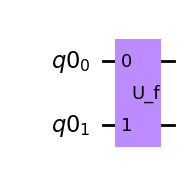

In [4]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

qc.append(Oracle(f1), qr)

qc.draw('mpl')

#Oracle(f2).to_matrix()

## Deutsch Algoritm

Create a quantum circuit implementing the Deutsch algorithm for a function $f\colon\{0,1\}\to\{0,1\}$ given as a parameter.

Create a function that runs the circuit a single time and answers if $f$ is constant or balanced.

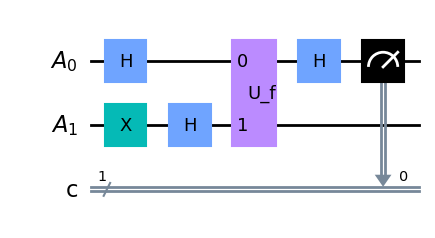

In [5]:
    A= QuantumRegister(2,'A')
    c=ClassicalRegister(1,'c')
    circuit = QuantumCircuit(A,c)
    circuit.h(0)
    circuit.x(1)
    circuit.h(1)
    circuit.append(Oracle(f1),A)
    circuit.h(0)
    circuit.measure(0,0)
    circuit.draw() 

In [6]:
def deutsch_al(f):
    A= QuantumRegister(2,'A')
    c=ClassicalRegister(1,'c')
    circuit = QuantumCircuit(A,c)
    circuit.h(0)
    circuit.x(1)
    circuit.h(1)
    circuit.append(Oracle(f),A)
    circuit.h(0)
    circuit.measure(0,0)
    
    
    result=AerSimulator().run(circuit, shots=1,memory=True).result()
    statistics = result.get_memory()
    print(statistics[0])
    if statistics[0] == '0':
        print('Constante')
    else:
        print('Balanced')
       
    
    
deutsch_al(f3)    

1
Balanced


## Deutsch-Josza algorithm

Generalize the XOR oracle generation for $n>=1$ and a function $f\colon\{0,1\}^n\to\{0,1\}$.

In [7]:
def ket_reg(n,x):
    if x < 0 or x > 2**n-1:
        return(-1)
    output = [[0] for i in range(x)]+[[1]]+ [[0] for i in range(2**n-x-1)]
    return(np.matrix(output))

In [8]:
def bra_reg(n,x):
    return(ket_reg(n,x).H)

In [9]:
ket_reg(3,3)

matrix([[0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0]])

In [10]:
bra_reg(4,5)

matrix([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
def Oracle_dj(n,f):
    unitary = np.matrix([[0 for i in range(2**(n+1))] for j in range(2**(n+1))])
    for b in range((2**n)):
        if f(b)==0: 
            unitary += np.kron(np.matrix([[1,0],[0,1]]),ket_reg(n,b) @ bra_reg(n,b)) 
        else:
            unitary += np.kron(np.matrix([[0,1],[1,0]]),ket_reg(n,b) @ bra_reg(n,b))
    return(UnitaryGate(unitary,label='U_f'))
    

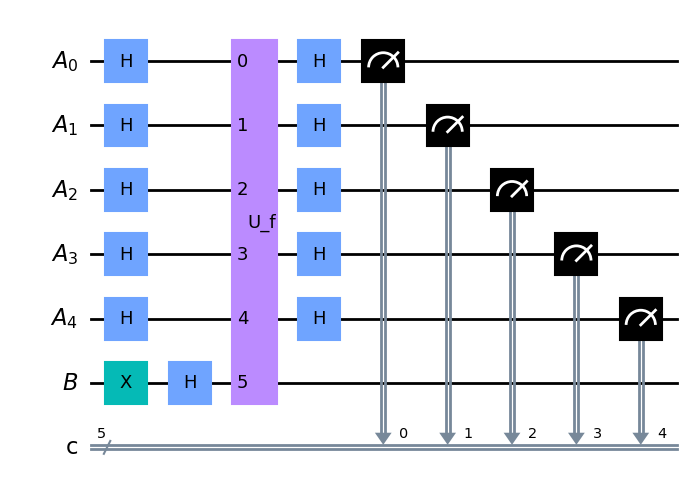

In [12]:

def deutsch_josza(n_inputs,f):
    A1=QuantumRegister(n_inputs,'A')
    B1=QuantumRegister(1,'B')
    c1=ClassicalRegister(n_inputs,'c')
    circuit1=QuantumCircuit(A1,B1,c1)
    
    
    circuit1.h(A1)
    
    circuit1.x(B1)
    circuit1.h(B1)
    
    circuit1.append(Oracle_dj(n_inputs,f),range(n_inputs+1))
    
    circuit1.h(A1)
        
    for qubit in range(n_inputs):
        circuit1.measure(A1[qubit],c1[qubit])
    
    return (circuit1)

circuito_DJ = deutsch_josza(5,f1)
circuito_DJ.draw()

  

    

In [13]:
result1=AerSimulator().run(circuito_DJ, shots=100,memory=True).result()
statistics1 = result1.get_memory()
print(statistics1)  


['00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '10110', '00000', '00000', '01010', '00000', '00000', '00000', '00000', '10110', '00000', '00000', '00000', '00000', '00010', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '01101', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '10000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00011', '00000', '00000', '00000', '00000', '00000', '00000', '11101', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00001', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '00000', '11111', '00000', '00000', '00010']


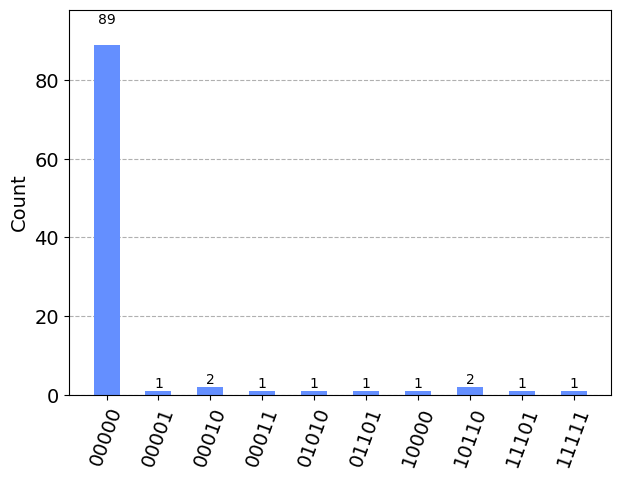

In [14]:
statistics1 = result1.get_counts()
plot_histogram(statistics1)

Implement the Deutsch-Josza algorithm